# MANIC / python demonstration notebook

In [1]:
import sys
sys.path.insert(0, '../library_files/MANIC_Python_Interface')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MANIC_Python as MANICP
import MAP_Monitor as MAPM
import MAP_Parameters as MAPP

## setting up variables to pass to the model

conversion factor (pptv to molecules / cm^3_air)

In [2]:
cfactor_p = 2.55e7

Obtain size of C (chemical) array

In [3]:
n_p_spec = MAPP.map_parameters.nspec

Initialise the C array (making sure to convert from Fortran to Python indexing)

In [4]:
c_p = np.zeros(n_p_spec,order='F')

Gas-phase species:

In [5]:
c_p[MAPP.map_parameters.ind_no2-1]		= 20.0*cfactor_p
c_p[MAPP.map_parameters.ind_o3-1]		= 20.0e3*cfactor_p
c_p[MAPP.map_parameters.ind_hcho-1]		= 300.0*cfactor_p
c_p[MAPP.map_parameters.ind_pan-1]		= 10.0*cfactor_p
c_p[MAPP.map_parameters.ind_co-1]		= 70.0e3*cfactor_p
c_p[MAPP.map_parameters.ind_hno3-1]		= 5.0*cfactor_p
c_p[MAPP.map_parameters.ind_so2-1]		= 90.0*cfactor_p
c_p[MAPP.map_parameters.ind_ch3sch3-1]	= 60.0*cfactor_p
c_p[MAPP.map_parameters.ind_h2o2-1]		= 600.0*cfactor_p
c_p[MAPP.map_parameters.ind_c2h6-1]		= 500.0*cfactor_p
c_p[MAPP.map_parameters.ind_hcl-1]		= 100.0*cfactor_p
c_p[MAPP.map_parameters.ind_ch3i-1]		= 2.0*cfactor_p
c_p[MAPP.map_parameters.ind_c3h7i-1]	= 1.0*cfactor_p
c_p[MAPP.map_parameters.ind_so2-1]		= 90.0*cfactor_p
c_p[MAPP.map_parameters.ind_no-1]		= 10.0*cfactor_p

Fixed species (mostly gas-phase)

In [6]:
c_p[MAPP.map_parameters.ind_nh3-1]		= 50.0*cfactor_p
c_p[MAPP.map_parameters.ind_o2-1]		= 2.1e11*cfactor_p
c_p[MAPP.map_parameters.ind_h2o-1]		= 1.25e10*cfactor_p
c_p[MAPP.map_parameters.ind_m-1]		= 1.0e12*cfactor_p
c_p[MAPP.map_parameters.ind_ch4-1]		= 1.8e6*cfactor_p
c_p[MAPP.map_parameters.ind_n2-1]		= 7.9e11*cfactor_p
c_p[MAPP.map_parameters.ind_h2-1]		= 5e5*cfactor_p
c_p[MAPP.map_parameters.ind_co2-1]		= 383e6*cfactor_p
c_p[MAPP.map_parameters.ind_source-1]   = 1e0

Aerosol species (initialised as molecules / cm^3_air)

In [7]:
c_p[MAPP.map_parameters.ind_bin001001num-1] 		= 8.99815e+02 
c_p[MAPP.map_parameters.ind_bin001002num-1] 		= 2.49219e+00 
c_p[MAPP.map_parameters.ind_bin001001nh4plu-1] 		= 4.51659e+10 
c_p[MAPP.map_parameters.ind_bin001002nh4plu-1] 		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001001so42min-1]		= 1.00318e+10 
c_p[MAPP.map_parameters.ind_bin001002so42min-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001001hso4min-1]		= 2.30321e+10 
c_p[MAPP.map_parameters.ind_bin001002hso4min-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001001no3min-1]		= 2.07013e+09 
c_p[MAPP.map_parameters.ind_bin001002no3min-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001001naplu-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002naplu-1]		= 2.38696e+12 
c_p[MAPP.map_parameters.ind_bin001001clmin-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002clmin-1]		= 2.37798e+12 
c_p[MAPP.map_parameters.ind_bin001001brmin-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002brmin-1]		= 2.02601e+09 
c_p[MAPP.map_parameters.ind_bin001001imin-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002imin-1]		= 1.27948e+05 
c_p[MAPP.map_parameters.ind_bin001001io3min-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002io3min-1]		= 3.39903e+05 
c_p[MAPP.map_parameters.ind_bin001001hco3min-1]		= 0.00000e+00 
c_p[MAPP.map_parameters.ind_bin001002hco3min-1]		= 6.94825e+09 

Duplicate Chemistry array - this initial composition information is used for boundary conditions

In [8]:
cnp_p = np.copy(c_p)

aerosol array size information

In [9]:
m_p 		= 1     # should import this from MAP_Global in future...
nd_p 		= 2
du_p 		= np.array([[2.1e0,3.6e0]],order='F')
uedge_p 	= np.array([[-9e-1,1.2e0],[-1.2e0,2.4e0]],order='F') 
r_r_p		= np.array([[8.8e-8],[1.67e-6]],order='F')

### Model Trajectory Information
(read in from a input text file)

In [10]:
mtocm = 100.0
trajset = pd.read_csv('traj_input.csv',sep='\s+')
time_traj_p = trajset.time
temp_traj_p = trajset.temp
pres_traj_p = trajset.pres
zmbl_traj_p = trajset.z_mbl  * mtocm
tide_traj_p = trajset.tidal
sun_traj_p  = trajset.sun

traj_length_p = len(time_traj_p)

### Solver control information

In [11]:
dt_p = 3600.0      # timestep size (seconds)
tstepmax_p = 300.0 # maximum timestep (seconds)
pdfite_p = 0       # logic (0/1) switch for controlling PD-FiTE solver

tstart_p = 0.0     # start time
tend_p   = time_traj_p[traj_length_p-1]   # get the end time from trajectory information

start_p = 1        # logic flag to indicate first step, forcing calculation of water, H+ and OH- content for aerosol

## Call the Solver

In [12]:
(c_p_new, cnp_new, tout_p) = MANICP.manic_python( n_p_spec=n_p_spec, c_p=c_p, cnp_p=cnp_p, cfactor_p=cfactor_p, 
										traj_length_p=traj_length_p, time_traj_p=time_traj_p,
										temp_traj_p=temp_traj_p, pres_traj_p=pres_traj_p, 
										zmbl_traj_p=zmbl_traj_p, tide_traj_p=tide_traj_p,
										sun_traj_p=sun_traj_p,
										dt_p=dt_p, tstepmax_p=tstepmax_p, pdfite_p=pdfite_p, 
										m_p=m_p, nd_p=nd_p, du_p=du_p, uedge_p=uedge_p, 
										r_r_p=r_r_p,
										tstart_p=tstart_p, tend_p=tend_p, start_p=start_p)

In [13]:
print('HNO3 orig= ', cnp_p[MAPP.map_parameters.ind_hno3-1])
print('HNO3 in? = ', c_p[MAPP.map_parameters.ind_hno3-1])
print('HNO3 out = ', c_p_new[MAPP.map_parameters.ind_hno3-1])

HNO3 orig=  127500000.0
HNO3 in? =  524960.7480814956
HNO3 out =  524960.7480814956


## Plotting the data

In [14]:
gas_chem = pd.read_csv('manic_gas_ppt.dat',sep='\s+')
manic_data = pd.read_csv('manic_microphysics.dat',sep='\s+')

Text(0.5,0,'Time [days] since start of simulation')

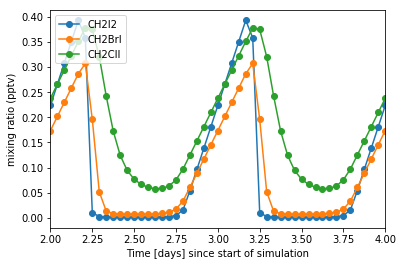

In [15]:
plt.plot(manic_data.Time/(3600*24),gas_chem.CH2I2,marker='o',label="CH2I2")
plt.plot(manic_data.Time/(3600*24),gas_chem.CH2BrI,marker='o',label="CH2BrI")
plt.plot(manic_data.Time/(3600*24),gas_chem.CH2ClI,marker='o',label="CH2ClI")
plt.xlim(2,4)
plt.legend(loc='upper left')
plt.ylabel("mixing ratio (pptv)")
plt.xlabel("Time [days] since start of simulation")
